In [2]:
import nltk
#natural language toolkit

In [3]:
nltk.download_shell()
#downloading stopwords for classification

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> stopwords


        C:\Users\dhruv\AppData\Roaming\nltk_data...
      Package stopwords is already up-to-date!



---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> q


In [31]:
from nltk.corpus import stopwords

In [23]:
import pandas as pd
import numpy as np

In [123]:
sms=pd.read_csv('/data science/sms_dataset.csv', encoding='latin-1')
sms.dropna(axis=1,inplace=True)
# https://docs.python.org/3/library/codecs.html#standard-encodings 

In [536]:
sms.head()

,type,text,text length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [16]:
sms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   type    5572 non-null   object
 1   text    5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [18]:
sms.describe()

,type,text
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [19]:
# import visualizing libraries


In [21]:
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline

In [125]:
bool=sms.isna()

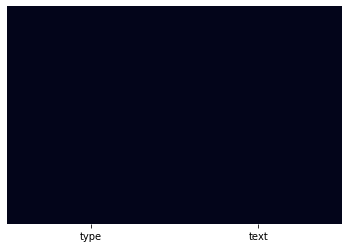

In [428]:
#checking if there is null value is any row 
sns.heatmap(bool, yticklabels=False, cbar=False)
#no null value is present

In [127]:
#adding 'text length' column in the Datframe
sms['text length']=sms['text'].apply(len)

In [545]:
#checking head of the dataframe 
sms.head()

,type,text,text length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


# visualizing using wordcloud

In [546]:
from wordcloud import WordCloud

In [130]:
spam_words=''.join(list(sms[sms['type']=='spam']['text']))

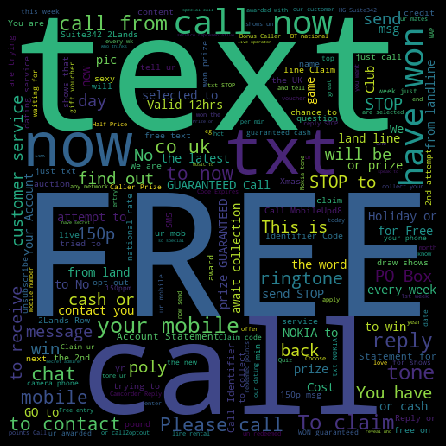

In [131]:
#representing most common words use in spam 
spam_wc=WordCloud(width=500,height=500).generate(spam_words)
plt.figure(figsize=(10,6),facecolor='k')
plt.imshow(spam_wc)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

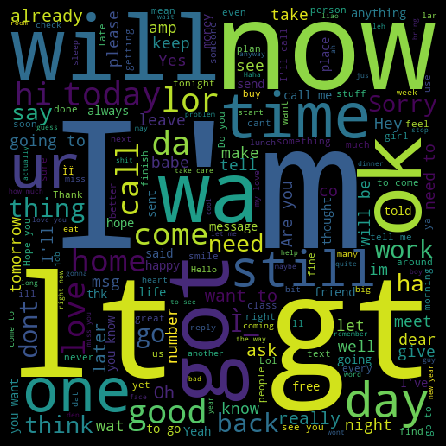

In [132]:
#representing similarly for ham 
ham_words=''.join(list(sms[sms['type']=='ham']['text']))
ham_wc=WordCloud(width=500,height=500).generate(ham_words)
plt.figure(figsize=(10,6),facecolor='k')
plt.imshow(ham_wc)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

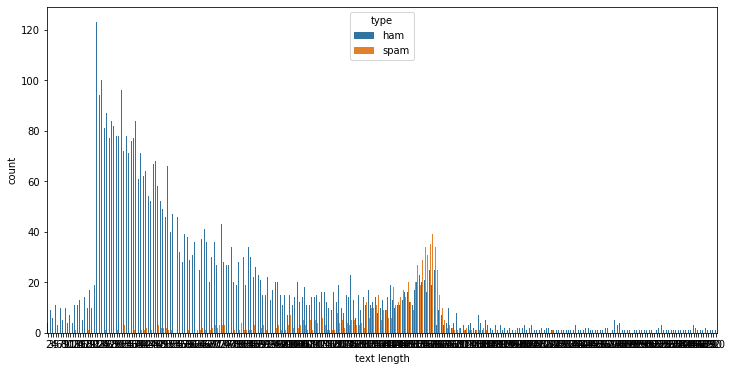

In [50]:
#visualization for show differnce between the length of ham and spam
plt.figure(figsize=(12,6))
sns.countplot(x='text length',data=sms,hue='type')
#it shows usually spam messages are longer as compared to the ham

In [133]:
import string

In [134]:
from nltk.stem import PorterStemmer

In [135]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [138]:
def clean_msg(texts):
    text=[text.lower() for text in texts]
    nopunc=[word for word in text if word not in string.punctuation]
    nopunc=''.join(nopunc)
    words= [word for word in nopunc.split() if word not in stopwords.words('english')]
    message=[PorterStemmer().stem(word) for word in words]
    return message

In [139]:
sms['text'].head(5).apply(clean_msg)

0    [go, jurong, point, crazi, avail, bugi, n, gre...
1                         [ok, lar, joke, wif, u, oni]
2    [free, entri, 2, wkli, comp, win, fa, cup, fin...
3        [u, dun, say, earli, hor, u, c, alreadi, say]
4    [nah, dont, think, goe, usf, live, around, tho...
Name: text, dtype: object

In [140]:
from sklearn.model_selection import train_test_split
# splitting data to train and test model

In [141]:
msg_train,msg_test,label_train,label_test=train_test_split(sms['text'],sms['type'], test_size=0.3)

In [540]:
#shape of the train and test model
print(msg_train.shape,msg_test.shape,label_train.shape,label_test.shape)

(3900,) (1672,) (3900,) (1672,)


 # Vectorization
 
Currently, we have the messages as lists of tokens (also known as lemmas) and now we need to convert each of those messages into a vector the SciKit Learn's algorithm models can work with.

Now we'll convert each message, represented as a list of tokens (lemmas) above, into a vector that machine learning models can understand.

We'll do that in three steps using the bag-of-words model:

Count how many times does a word occur in each message (Known as term frequency)

Weigh the counts, so that frequent tokens get lower weight (inverse document frequency)

Normalize the vectors to unit length, to abstract from the original text length (L2 norm)

Let's begin the first step:

In [143]:
from sklearn.feature_extraction.text import CountVectorizer

In [541]:
bow=CountVectorizer(analyzer=clean_msg).fit(sms['text'].apply(lambda x: np.str_(x)))

### total no. of vocabulary words

In [148]:

print(len(bow.vocabulary_))

8097


In [324]:
#checking fourth text of the dataset
message=sms['text'][3]
message

'U dun say so early hor... U c already then say...'

In [542]:
#checking by transforming 4th message
bow4 = bow.transform([message4])
print(bow4)
print(bow4.shape)

  (0, 1081)	1
  (0, 1741)	1
  (0, 2624)	1
  (0, 2641)	1
  (0, 3647)	1
  (0, 6124)	2
  (0, 7289)	2
(1, 8097)


### transforming all the texts

In [153]:

message_bow=bow.transform(sms['text'])

In [543]:
print('Shape of Sparse Matrix: ', message_bow.shape)
print('Amount of Non-Zero occurences: ', message_bow.nnz)

Shape of Sparse Matrix:  (5572, 8097)
Amount of Non-Zero occurences:  49502


### calculating the sparsity percentage

In [544]:
sparsity = (100.0 * message_bow.nnz / (message_bow.shape[0] * message_bow.shape[1]))
print('sparsity percentage: {}'.format(sparsity*100))

sparsity percentage: 10.972042945545137


# TF-IDF

TF-IDF stands for term frequency-inverse document frequency, and the tf-idf weight is a weight often used in information retrieval and text mining. This weight is a statistical measure used to evaluate how important a word is to a document in a collection or corpus. The importance increases proportionally to the number of times a word appears in the document but is offset by the frequency of the word in the corpus. Variations of the tf-idf weighting scheme are often used by search engines as a central tool in scoring and ranking a document's relevance given a user query.

One of the simplest ranking functions is computed by summing the tf-idf for each query term; many more sophisticated ranking functions are variants of this simple model.

Typically, the tf-idf weight is composed by two terms: the first computes the normalized Term Frequency (TF), aka. the number of times a word appears in a document, divided by the total number of words in that document; the second term is the Inverse Document Frequency (IDF), computed as the logarithm of the number of the documents in the corpus divided by the number of documents where the specific term appears.

TF: Term Frequency, which measures how frequently a term occurs in a document. Since every document is different in length, it is possible that a term would appear much more times in long documents than shorter ones. Thus, the term frequency is often divided by the document length (aka. the total number of terms in the document) as a way of normalization:

TF(t) = (Number of times term t appears in a document) / (Total number of terms in the document).

IDF: Inverse Document Frequency, which measures how important a term is. While computing TF, all terms are considered equally important. However it is known that certain terms, such as "is", "of", and "that", may appear a lot of times but have little importance. Thus we need to weigh down the frequent terms while scale up the rare ones, by computing the following:

IDF(t) = log_e(Total number of documents / Number of documents with term t in it).

In [158]:
from sklearn.feature_extraction.text import TfidfTransformer

In [159]:
tfidf=TfidfTransformer().fit(message_bow)

In [539]:
#checking for 4th message
tfidf4 = tfidf.transform(bow4)
print(tfidf4)

  (0, 7289)	0.32798758661760335
  (0, 6124)	0.5295474584813086
  (0, 3647)	0.4752657406226195
  (0, 2641)	0.3433315709502243
  (0, 2624)	0.31627127288965357
  (0, 1741)	0.2936722408619142
  (0, 1081)	0.28631911796443377


# To transform the entire bag-of-words corpus into TF-IDF corpus at once

In [166]:
message_tf=tfidf.transform(message_bow)

In [167]:
#shape of the tfidf model
print(message_tf.shape)

(5572, 8097)


In [168]:
#training a model
from sklearn.naive_bayes import MultinomialNB
spam_model = MultinomialNB().fit(message_tf, sms['type'])

In [538]:
#model evaluation
all_predictions = spam_model.predict(message_tf)
print(all_predictions)

['ham' 'ham' 'spam' ... 'ham' 'ham' 'ham']


# importing metrics libraries

In [172]:
from sklearn.metrics import classification_report,confusion_matrix

In [174]:
print (classification_report(sms['type'], all_predictions))
print('\n')
print (confusion_matrix(sms['type'], all_predictions))

              precision    recall  f1-score   support

         ham       0.97      1.00      0.99      4825
        spam       1.00      0.83      0.91       747

    accuracy                           0.98      5572
   macro avg       0.99      0.91      0.95      5572
weighted avg       0.98      0.98      0.98      5572



[[4825    0]
 [ 128  619]]


# pipeline for doing on train test data


In [177]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=clean_msg)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', MultinomialNB()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

In [178]:
pipeline.fit(msg_train,label_train)

Pipeline(memory=None,
         steps=[('bow',
                 CountVectorizer(analyzer=<function clean_msg at 0x0000023723B1BE58>,
                                 binary=False, decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('classifier',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [455]:
prediction=pipeline.predict(msg_test)

In [180]:
print (classification_report(label_test, prediction))
print('\n')
print (confusion_matrix(label_test, prediction))

              precision    recall  f1-score   support

         ham       0.94      1.00      0.97      1431
        spam       1.00      0.65      0.79       241

    accuracy                           0.95      1672
   macro avg       0.97      0.82      0.88      1672
weighted avg       0.95      0.95      0.94      1672



[[1431    0]
 [  85  156]]


# XGBoost Classifier



In [205]:
import xgboost as xgb

In [207]:
pipe_XGB = Pipeline([ ('bow'  , CountVectorizer(analyzer = clean_msg) ),
                      ('tfidf'   , TfidfTransformer() ),
                      ('clf_XGB' , xgb.XGBClassifier(random_state=5) ),
                    ])

parameters_XGB = { 'tfidf__use_idf': (True, False), 
                   'clf_XGB__eta': (0.01, 0.02),
                   'clf_XGB__max_depth': (5,6), 
                 }

grid_XGB = GridSearchCV(pipe_XGB, parameters_XGB, 
                        cv=5, n_jobs=-1, verbose=1)

grid_XGB.fit(X=msg_train, y=label_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:  2.9min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('bow',
                                        CountVectorizer(analyzer=<function clean_msg at 0x0000023723B1BE58>,
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.int64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=1,
                                                        ngram_range=(1, 1),
                         

In [209]:
grid_XGB.best_params_

{'clf_XGB__eta': 0.01, 'clf_XGB__max_depth': 6, 'tfidf__use_idf': False}

In [398]:
grid_XGB.best_score_

0.962051282051282

## sms example 1

In [403]:
message_1='A redacted loan for £950 is approved for you if you receive this SMS. 1 min verification & cash in 1 hr at www.[redacted].co.uk to opt out reply stop'
message_1

'A redacted loan for £950 is approved for you if you receive this SMS. 1 min verification & cash in 1 hr at www.[redacted].co.uk to opt out reply stop'

## sms example 2

In [534]:
message_2='hey bro wassup '
message_2

'hey bro wassup '

In [506]:
def Classify(text):
    
    word=bow.transform([text])
    #print(word)
    txt=tfidf.transform(word)
    spam_or_ham = spam_model.predict(txt)    
    print(spam_or_ham)
        

In [514]:
spam_ham=Classify(message_1)

['spam']


In [535]:
spam_ham=Classify(message_2)

['ham']
